# Copy List with Random Pointer
$\quad$ A linked list of length $n$ is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

$\quad$ Construct a deep copy of the list. The deep copy should consist of exactly $n$ brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the $next$ and $random$ pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

$\quad$ For example, if there are two nodes $X$ and $Y$ in the original list, where $X.random\rightarrow Y$, then for the corresponding two nodes $x$ and $y$ in the copied list, $x.random\rightarrow y$.

$\quad$ Return the head of the copied linked list.

$\quad$ The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of $[val, random\_index]$ where:

- $val$: an integer representing $Node.val$
- $random\_index$: the index of the node (range from $0$ to $n-1$) that the random pointer points to, or null if it does not point to any node.

$\quad$Your code will only be given the head of the original linked list.

# Examples
**Example 1:**<br>
Input: $head = [[7,null],[13,0],[11,4],[10,2],[1,0]]$<br>
Output: $[[7,null],[13,0],[11,4],[10,2],[1,0]]$

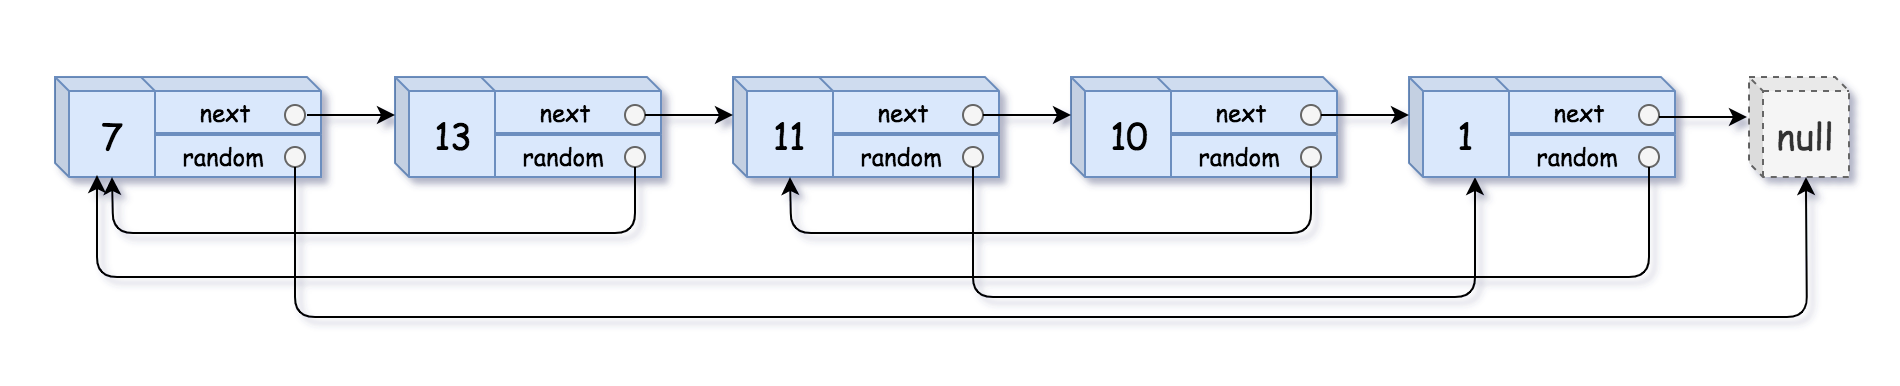

**Example 2:**<br>
Input: $head = [[1,1],[2,1]]$<br>
Output: $[[1,1],[2,1]]$

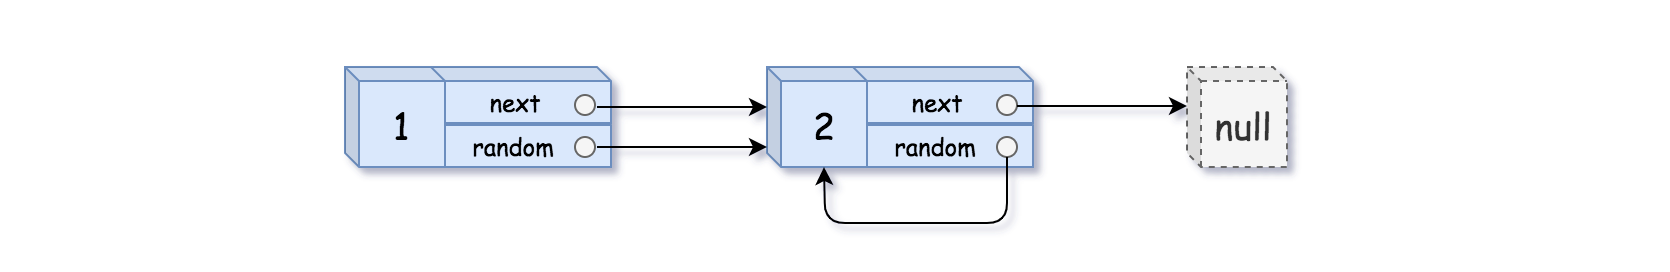

**Example 3:**<br>
Input: $head = [[3,null],[3,0],[3,null]]$<br>
Output: $[[3,null],[3,0],[3,null]]$

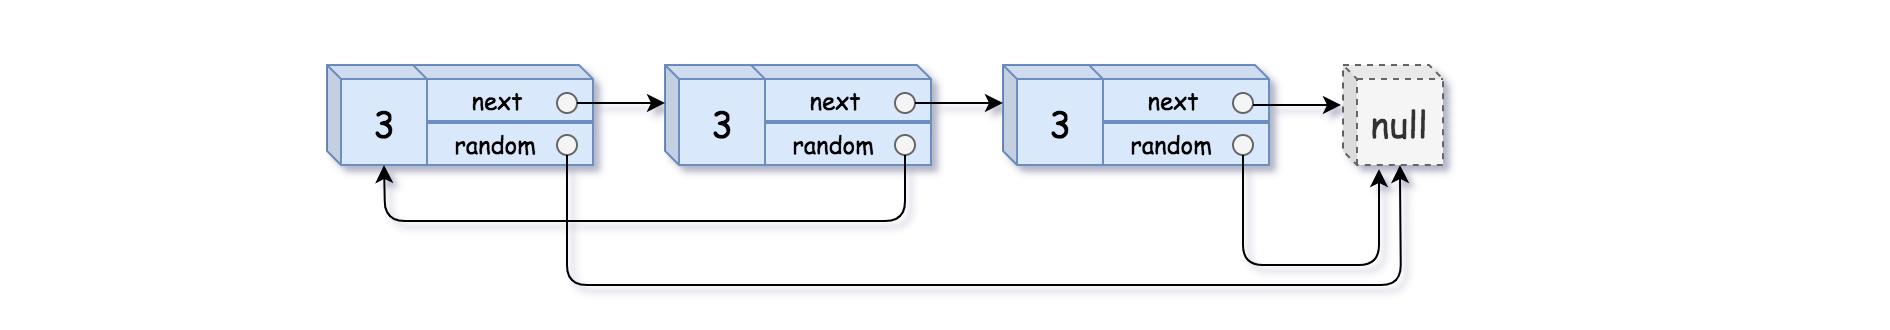

In [1]:
'''
    Method 1: Using Hash Table
    Time Complexity: O(n)
    Space Complexity: O(n)
'''

from typing import Optional

# Definition for a Node.


class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random


class Solution:
    def copyRandomList(self, head: Optional[Node]) -> Optional[Node]:
        if not head:
            return None
        old_to_new = {}

        curr = head
        while curr:
            old_to_new[curr] = Node(curr.val)
            curr = curr.next

        curr = head
        while curr:
            old_to_new[curr].next = old_to_new.get(curr.next)
            old_to_new[curr].random = old_to_new.get(curr.random)
            curr = curr.next

        return old_to_new[head]

$\quad$ In Python, dictionary keys must be hashable. By default, Python objects are hashed based on their `id`, which ensures that each object instance has a unique hash value. Therefore, as long as you do not override the `__hash__` and `__eq__` methods, instances of a class can be used as dictionary keys.

In [2]:
'''
    Method 2: Using Interweaving Nodes
    Time Complexity: O(n)
    Space Complexity: O(1)
'''

from typing import Optional


# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random


class Solution:
    def copyRandomList(self, head: Optional[Node]) -> Optional[Node]:
        if not head:
            return None

        curr = head
        while curr:
            new_node = Node(curr.val, curr.next)
            curr.next = new_node
            curr = new_node.next

        curr = head
        while curr:
            if curr.random:
                curr.next.random = curr.random.next
            curr = curr.next.next

        old_head = head
        new_head = head.next
        curr_old = old_head
        curr_new = new_head

        while curr_old:
            curr_old.next = curr_old.next.next
            curr_new.next = curr_new.next.next if curr_new.next else None
            curr_old = curr_old.next
            curr_new = curr_new.next

        return new_head

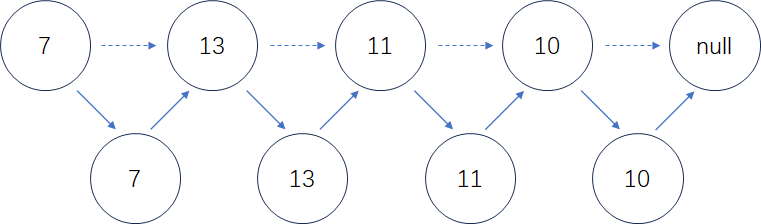

$\quad$ As shown in the figure above, the initial linked list is represented by dashed lines, while the linked list after the first iteration is represented by solid lines.